# Análisis de los datos del Dataset

### Importar librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

#### Cargar el DataSet
Importamos el csv del DataSet y lo guardamos en la variable dataset

In [2]:
dataset = pd.read_csv("archivo_gym_members_exercise_tracking_version2.csv")

### Descripción general del Dataset
Comenzamos con una descripción básica del dataset: número de filas, columnas, nombres de las columnas y los tipos de datos

In [3]:
print(f"Dimensiones del Dataset: {dataset.shape}\n")
print(f"Tipos de datos de las columnas:\n{dataset.dtypes}")

Dimensiones del Dataset: (973, 19)

Tipos de datos de las columnas:
id                                 int64
Age                                int64
Gender                             int64
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
Workout_Cardio                     int64
Workout_HIIT                       int64
Workout_Strength                   int64
Workout_Yoga                       int64
dtype: object


### Análisis de valores nulos
Identificamos si alguna columna tiene valores nulos y la cantidad de datos faltantes por columna.

Esto es determinante hacerlo, ya que si obtenemos valores nulos o vacíos, pueden afectar el análisis y los modelos predictivos

In [4]:
print(f"Valores nulos por columna:\n\n{dataset.isnull().sum()}")

Valores nulos por columna:

id                               0
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
Workout_Cardio                   0
Workout_HIIT                     0
Workout_Strength                 0
Workout_Yoga                     0
dtype: int64


### Estadísticas descriptivas
Calculamos estadísticas como la media, mediana, desviación estándar, los valores mínimos y máximos, etc. para las columnas numéricas.

Esto nos dará una visión rápida de cómo se distribuyen los datos en términos de tendencia central y dispersión.

In [5]:
print(f"Estadísticas descriptivas:\n\n{dataset.describe()}")

Estadísticas descriptivas:

               id         Age      Gender  Weight (kg)  Height (m)  \
count  973.000000  973.000000  973.000000   973.000000   973.00000   
mean   487.000000   38.683453    0.525180    73.854676     1.72258   
std    281.025206   12.180928    0.499622    21.207500     0.12772   
min      1.000000   18.000000    0.000000    40.000000     1.50000   
25%    244.000000   28.000000    0.000000    58.100000     1.62000   
50%    487.000000   40.000000    1.000000    70.000000     1.71000   
75%    730.000000   49.000000    1.000000    86.000000     1.80000   
max    973.000000   59.000000    1.000000   129.900000     2.00000   

          Max_BPM     Avg_BPM  Resting_BPM  Session_Duration (hours)  \
count  973.000000  973.000000   973.000000                973.000000   
mean   179.883864  143.766701    62.223022                  1.256423   
std     11.525686   14.345101     7.327060                  0.343033   
min    160.000000  120.000000    50.000000           

### Distribución de variables numéricas

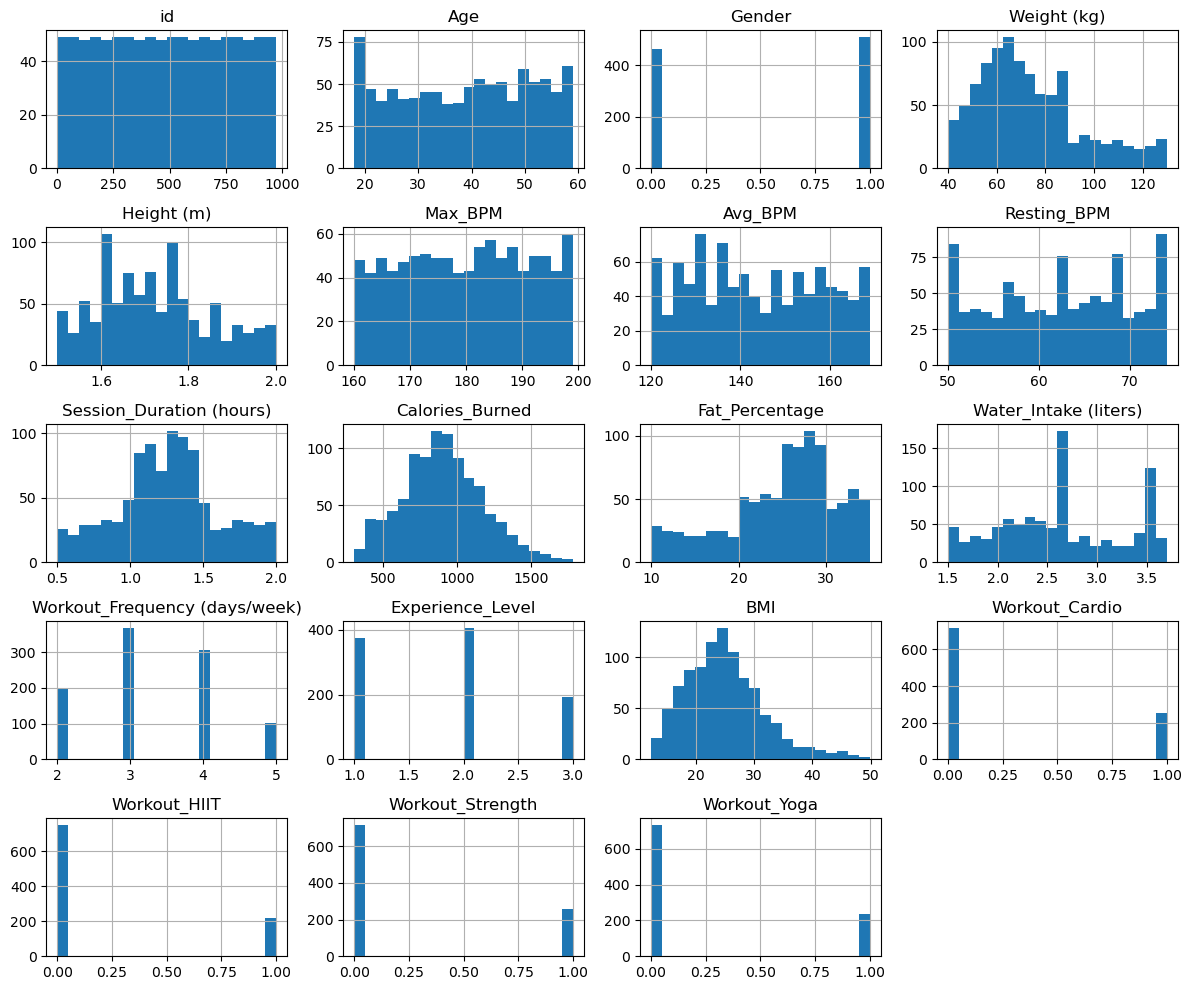

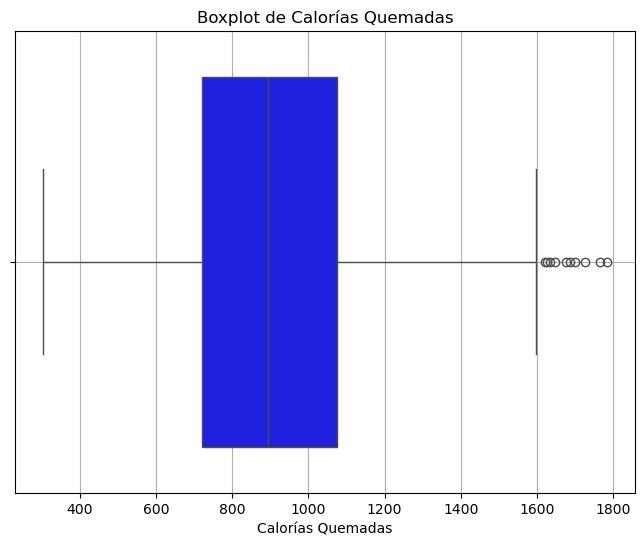

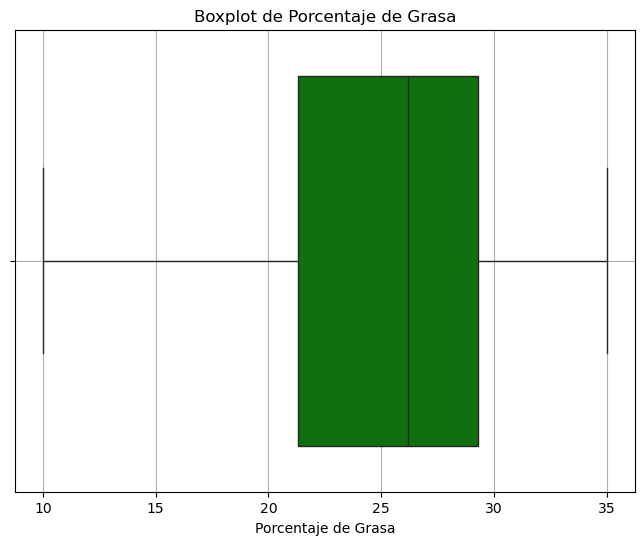

In [6]:
# Grafica de histogramas para las variables numéricas
dataset.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

# Grafica de boxplots para algunas variables claves
# 1. Boxplot para Calorías quemadas
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['Calories_Burned'], color='blue')
plt.title('Boxplot de Calorías Quemadas')
plt.xlabel('Calorías Quemadas')
plt.grid(True)
plt.show()

# 2. Boxplot para Porcentaje de Grasa
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['Fat_Percentage'], color='green')
plt.title('Boxplot de Porcentaje de Grasa')
plt.xlabel('Porcentaje de Grasa')
plt.grid(True)
plt.show()

### Correlación entre variables
Analizamos la correlación entre las variables numéricas para identificar relaciones importantes. Esto ayuda a descubrir cómo interactúan entre sí las características del dataset.


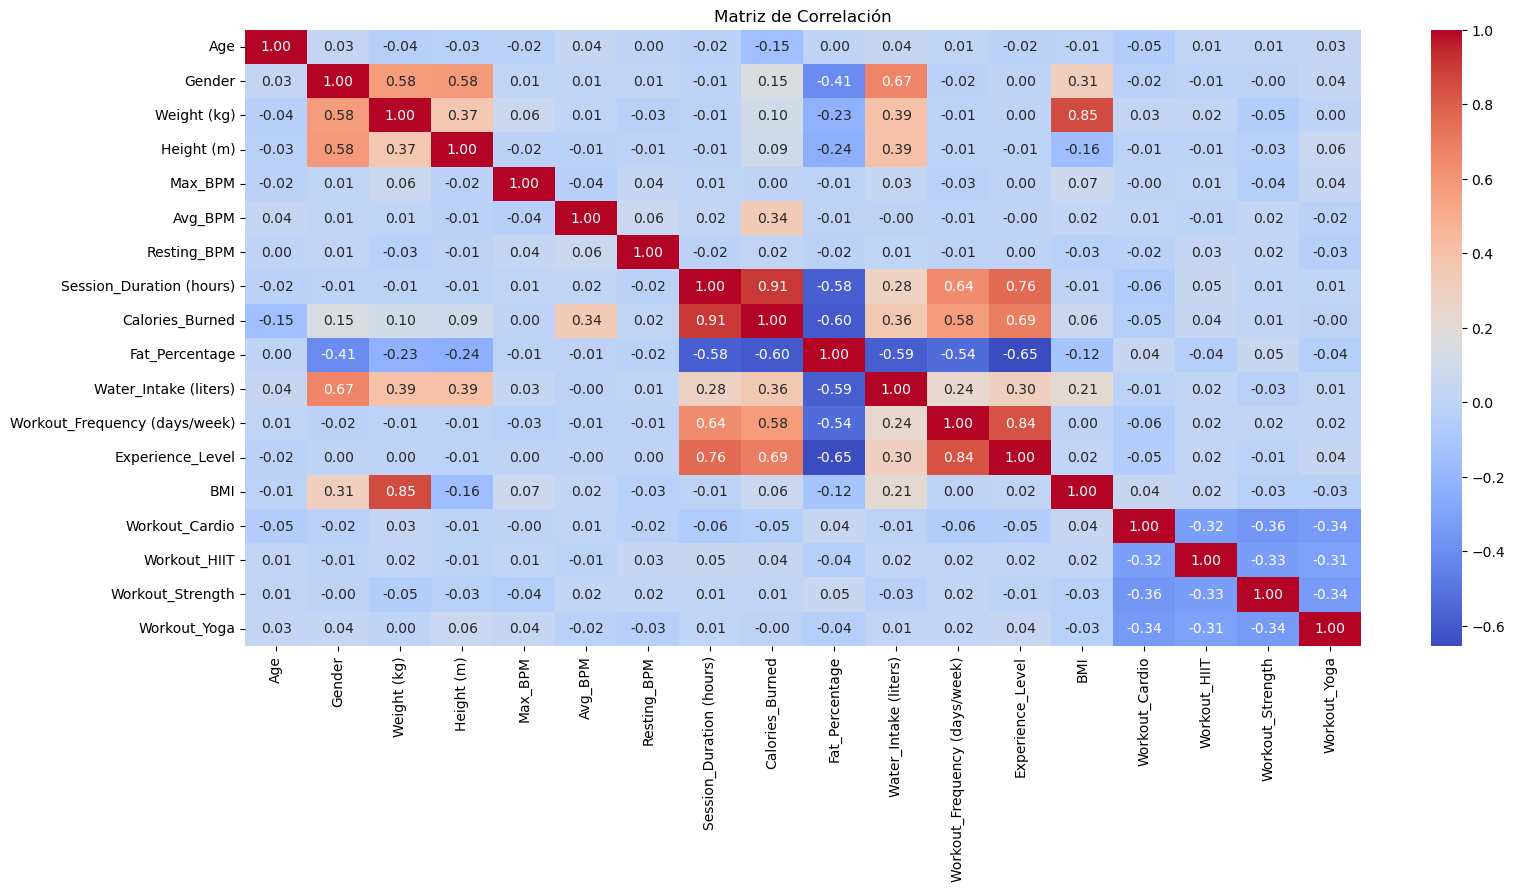

In [8]:

# Antes de eso vamos a seleccionar solo las columnas numéricas, excluyendo 'Workout_Type' 'id'
numeric_columns = dataset.drop(columns=['id']).select_dtypes(include=['number'])

plt.figure(figsize=(18, 8))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()



### Análisis de variables categóricas
Para las columnas categóricas (por ejemplo, "Gender" o "Workout_Type"), contamos las frecuencias de cada categoría y haremos gráficos de barras para mostrar la distribución.


Distribución de Gender:
Gender
1    511
0    462
Name: count, dtype: int64


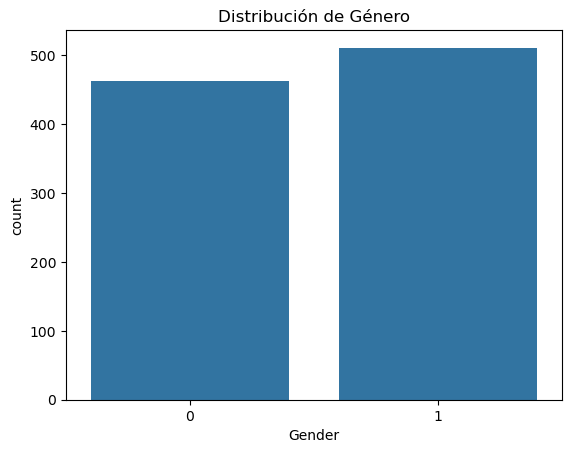

In [19]:
# Ver la distribución de la columna 'Gender'
print(f"Distribución de Gender:\n{dataset['Gender'].value_counts()}")

# Grafica de la distribución de género
sns.countplot(x='Gender', data=dataset)
plt.title('Distribución de Género')
plt.show()

# Ver la distribución de la columna 'Workout_Type'
#print(f"Distribución de Workout_Type:\n{dataset['Workout_Type'].value_counts()}")

# Grafica de la distribución de tipos de ejercicio
#sns.countplot(x='Workout_Type', data=dataset)
#plt.title('Distribución de Tipos de Ejercicio')
#plt.xticks(rotation=45)
#plt.show()


### Análisis de Outliers
Usamos boxplots para identificar posibles outliers en las variables numéricas. Los outliers pueden distorsionar los resultados, por eso hay que tenerlos en cuenta


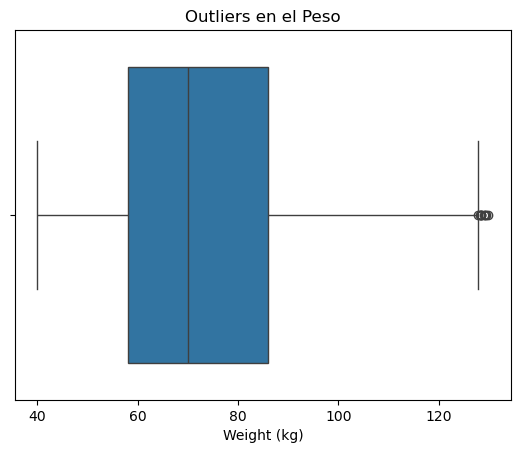

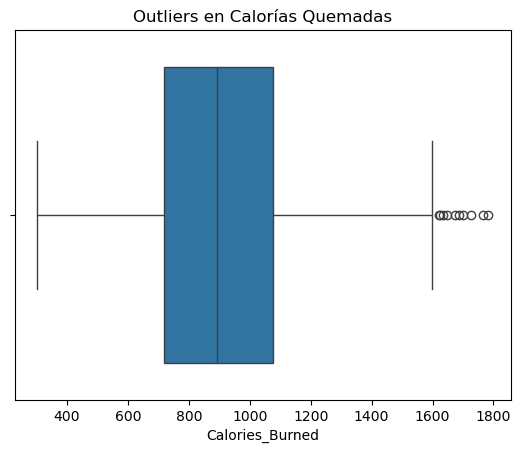

In [ ]:
sns.boxplot(x=dataset['Weight (kg)'])
plt.title('Outliers en el Peso')
plt.show()

sns.boxplot(x=dataset['Calories_Burned'])
plt.title('Outliers en Calorías Quemadas')
plt.show()

### Distribución de atributos físicos
Estudiamos atributos físicos, como "Weight (kg)", "Height (m)", y "BMI", para ver cómo se distribuyen y si hay alguna tendencia importante entre ellos.


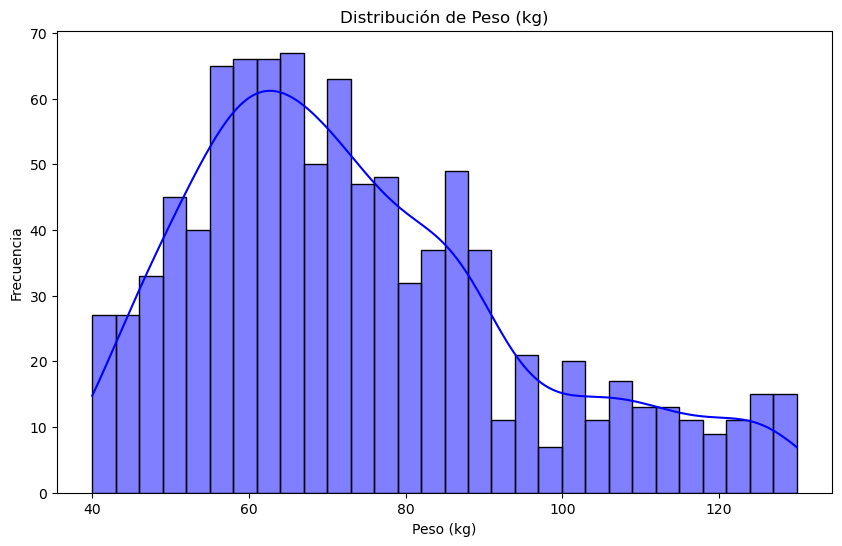

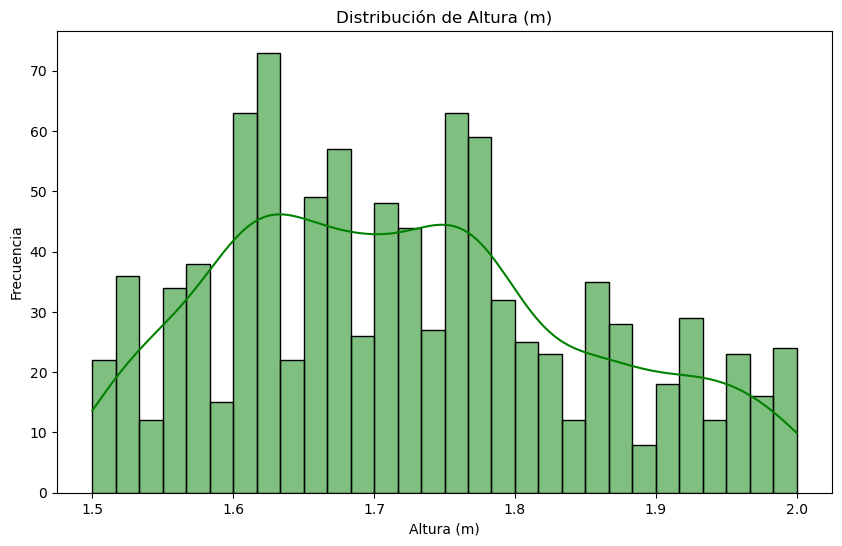

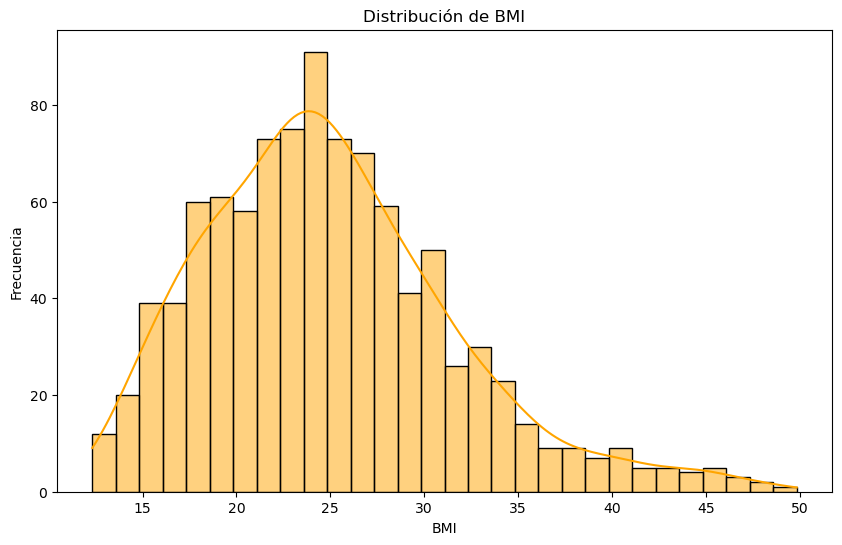

In [10]:
# Visualizar la distribución de Weight (kg)
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Weight (kg)'], kde=True, bins=30, color='blue')
plt.title('Distribución de Peso (kg)')
plt.xlabel('Peso (kg)')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la distribución de Height (m)
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Height (m)'], kde=True, bins=30, color='green')
plt.title('Distribución de Altura (m)')
plt.xlabel('Altura (m)')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la distribución del BMI
plt.figure(figsize=(10, 6))
sns.histplot(dataset['BMI'], kde=True, bins=30, color='orange')
plt.title('Distribución de BMI')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.show()

### Análisis de nivel de experiencia y frecuencia de entrenamiento

Distribución de Experience_Level:
Experience_Level
2    406
1    376
3    191
Name: count, dtype: int64


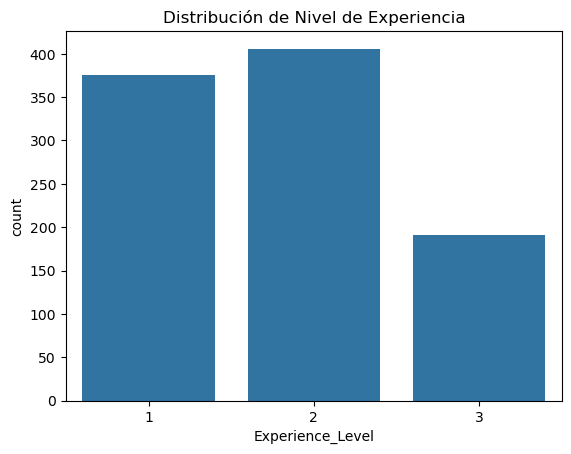

Distribución de Workout_Frequency:
Workout_Frequency (days/week)
3    368
4    306
2    197
5    102
Name: count, dtype: int64


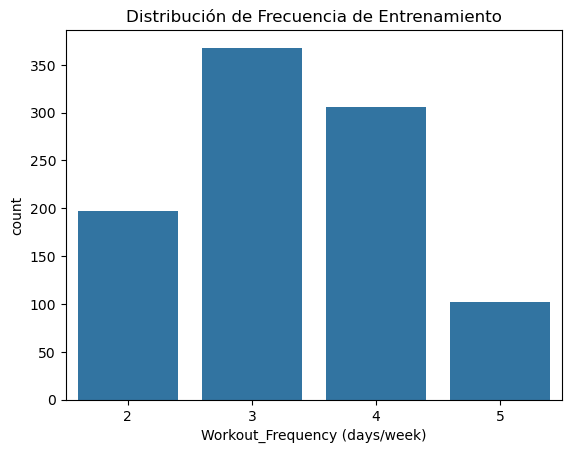

In [11]:
# Ver la distribución de la columna 'Experience_Level'
print(f"Distribución de Experience_Level:\n{dataset['Experience_Level'].value_counts()}")

# Graficar la distribución del nivel de experiencia
sns.countplot(x='Experience_Level', data=dataset)
plt.title('Distribución de Nivel de Experiencia')
plt.show()

# Ver la distribución de la columna 'Workout_Frequency'
print(f"Distribución de Workout_Frequency:\n{dataset['Workout_Frequency (days/week)'].value_counts()}")

# Graficar la distribución de la frecuencia de entrenamiento
sns.countplot(x='Workout_Frequency (days/week)', data=dataset)
plt.title('Distribución de Frecuencia de Entrenamiento')
plt.show()


### Rango de los Atributos Físicos

Determinamos los rangos de las variables físicas clave, como el peso, la altura y el BMI, para entender mejor los valores extremos.

In [12]:
# Rango de Peso y Altura
print("Rango de Peso:", dataset['Weight (kg)'].min(), "-", dataset['Weight (kg)'].max())
print("Percentiles del Peso:", dataset['Weight (kg)'].quantile([0.25, 0.5, 0.75]))

print("Rango de Altura:", dataset['Height (m)'].min(), "-", dataset['Height (m)'].max())
print("Percentiles de Altura:", dataset['Height (m)'].quantile([0.25, 0.5, 0.75]))

# Rango de BMI
print("Rango de BMI:", dataset['BMI'].min(), "-", dataset['BMI'].max())
print("Percentiles del BMI:", dataset['BMI'].quantile([0.25, 0.5, 0.75]))

Rango de Peso: 40.0 - 129.9
Percentiles del Peso: 0.25    58.1
0.50    70.0
0.75    86.0
Name: Weight (kg), dtype: float64
Rango de Altura: 1.5 - 2.0
Percentiles de Altura: 0.25    1.62
0.50    1.71
0.75    1.80
Name: Height (m), dtype: float64
Rango de BMI: 12.32 - 49.84
Percentiles del BMI: 0.25    20.11
0.50    24.16
0.75    28.56
Name: BMI, dtype: float64


### Porcentaje de Personas con BMI Saludable
Analizamos cuántas personas tienen un BMI dentro del rango saludable (18.5-24.9)


In [13]:
# Identificar las personas con BMI saludable
healthy_bmi = dataset[(dataset['BMI'] >= 18.5) & (dataset['BMI'] <= 24.9)]
print(f"Porcentaje de personas con BMI saludable: {len(healthy_bmi) / len(dataset) * 100}%")


Porcentaje de personas con BMI saludable: 37.61562178828366%


### Identificación de Valores Atípicos (Outliers)
Verificamos si existen valores atípicos en el dataset que podrían afectar el análisis posterior.

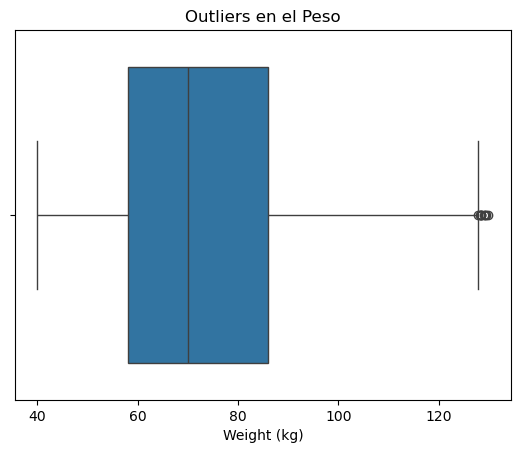

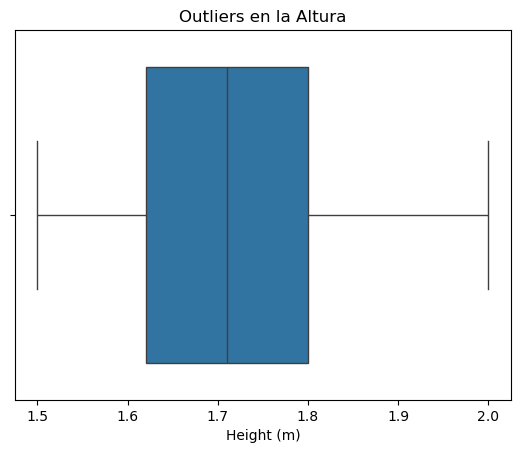

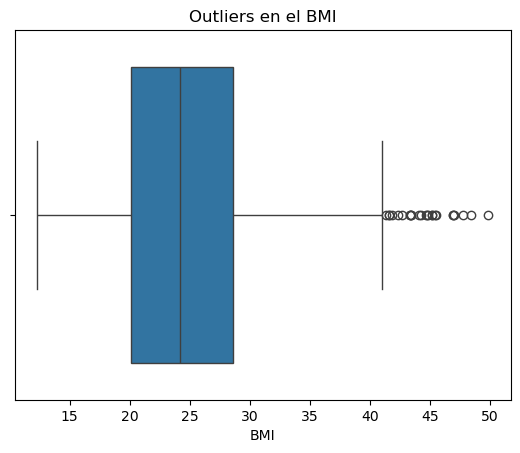

In [14]:
# Boxplot para detectar outliers
sns.boxplot(data=dataset, x='Weight (kg)')
plt.title('Outliers en el Peso')
plt.show()

sns.boxplot(data=dataset, x='Height (m)')
plt.title('Outliers en la Altura')
plt.show()

sns.boxplot(data=dataset, x='BMI')
plt.title('Outliers en el BMI')
plt.show()

### Distribución por Grupos (Género, Nivel de Experiencia)
Visualizamos cómo varían las métricas físicas según diferentes grupos, como el género o el nivel de experiencia

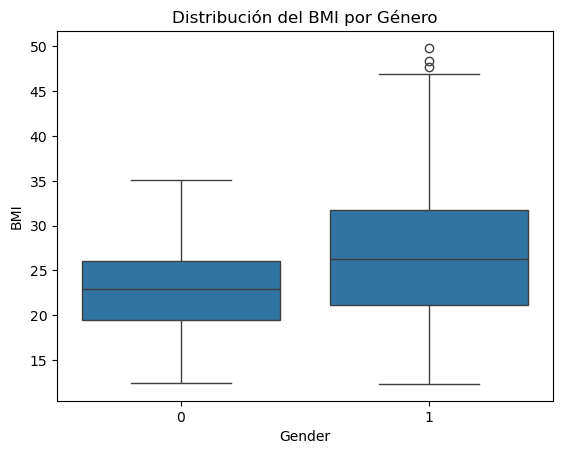

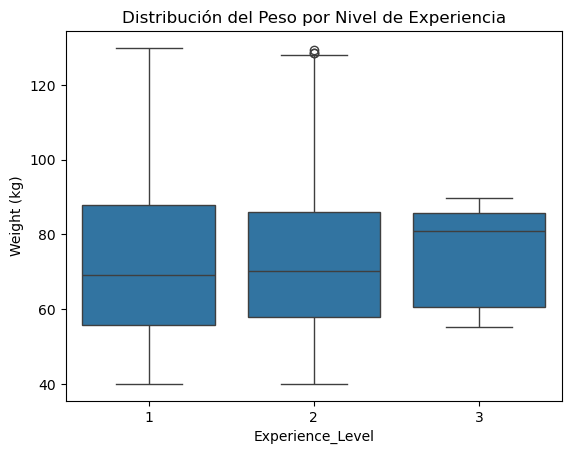

In [15]:
# Boxplot de BMI por Género
sns.boxplot(data=dataset, x='Gender', y='BMI')
plt.title('Distribución del BMI por Género')
plt.show()

# Boxplot de Peso por Nivel de Experiencia
sns.boxplot(data=dataset, x='Experience_Level', y='Weight (kg)')
plt.title('Distribución del Peso por Nivel de Experiencia')
plt.show()

### Transformación de Variables para Mejor Clustering
Si algún atributo muestra una distribución sesgada, podemos aplicar transformaciones. Por ejemplo, transformamos el BMI si es necesario

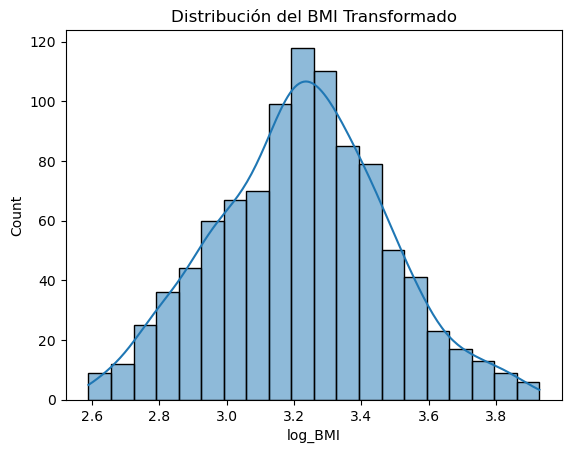

In [16]:
# Transformación logarítmica del BMI para normalizarlo
dataset['log_BMI'] = np.log1p(dataset['BMI'])  # Para evitar valores negativos en el logaritmo
sns.histplot(dataset['log_BMI'], kde=True)
plt.title('Distribución del BMI Transformado')
plt.show()

### Análisis de Interacciones entre Atributos
Visualizamos cómo interactúan las variables entre sí para ver posibles patrones y relaciones

c:\Users\carlo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


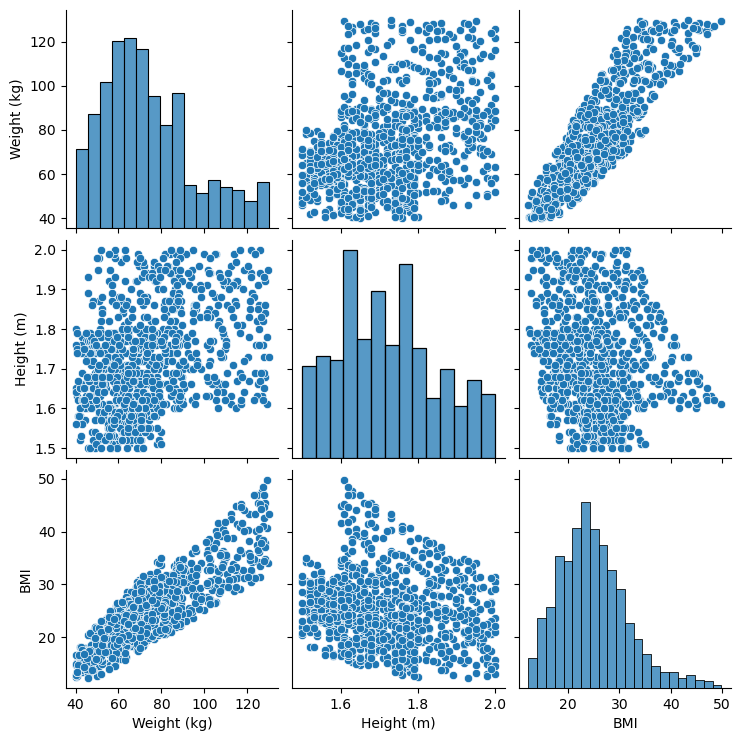

In [17]:
# Matriz de dispersión entre Peso, Altura y BMI
sns.pairplot(dataset[['Weight (kg)', 'Height (m)', 'BMI']])
plt.show()